In [72]:
import pandas as pd
import numpy as np
from collections import Counter

Ideas
- love counter
- emoji use summary
- attachments
- who sent more texts
- who sent longer texts
- times of the day that we text

In [73]:
df = pd.read_csv('/Users/gabrieltaylor/Downloads/Messages - Claire Robinson.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49828 entries, 0 to 49827
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Chat Session     49828 non-null  object 
 1   Message Date     49828 non-null  object 
 2   Delivered Date   23727 non-null  object 
 3   Read Date        25570 non-null  object 
 4   Service          49828 non-null  object 
 5   Type             49828 non-null  object 
 6   Sender ID        26083 non-null  float64
 7   Sender Name      26083 non-null  object 
 8   Status           49681 non-null  object 
 9   Replying to      2311 non-null   object 
 10  Subject          0 non-null      float64
 11  Text             45312 non-null  object 
 12  Attachment       4520 non-null   object 
 13  Attachment type  4520 non-null   object 
dtypes: float64(2), object(12)
memory usage: 5.3+ MB


In [75]:
df.head()

,Chat Session,Message Date,Delivered Date,Read Date,Service,Type,Sender ID,Sender Name,Status,Replying to,Subject,Text,Attachment,Attachment type
0,Claire Robinson,2021-02-03 22:02:10,NaN,2021-02-03 22:37:40,iMessage,Incoming,1.309371e+10,Claire Robinson,Read,NaN,NaN,"hey it’s claire from hinge, when’s our first d...",NaN,NaN
1,Claire Robinson,2021-02-03 22:39:59,2021-02-03 22:40:48,NaN,iMessage,Outgoing,NaN,NaN,Delivered,NaN,NaN,Next Friday,NaN,NaN
2,Claire Robinson,2021-02-03 22:40:05,2021-02-03 22:40:48,NaN,iMessage,Outgoing,NaN,NaN,Delivered,NaN,NaN,I can’t believe you forgot,NaN,NaN
3,Claire Robinson,2021-02-04 14:05:01,NaN,2021-02-04 17:41:59,iMessage,Incoming,1.309371e+10,Claire Robinson,Read,NaN,NaN,Ohh now I remember! can’t wait my love,NaN,NaN
4,Claire Robinson,2021-02-08 13:38:45,2021-02-08 13:38:46,NaN,iMessage,Outgoing,NaN,NaN,Delivered,NaN,NaN,Where are you living rn,NaN,NaN


Claire words

In [76]:
claire_corpus = df.loc[df.Type == 'Incoming', 'Text'].str.cat(sep=' ')

In [77]:
claire_corpus = [i.lower() for i in claire_corpus.split()]

In [79]:
claire_words = dict(Counter(claire_corpus).most_common())

In [80]:
claire_words['love']

768

Gabe words

In [81]:
gabe_corpus = df.loc[df.Type == 'Outgoing', 'Text'].str.cat(sep=' ')

In [82]:
gabe_corpus = [i.lower() for i in gabe_corpus.split()]

In [83]:
gabe_words = dict(Counter(gabe_corpus).most_common())

In [84]:
gabe_words['love']

535

In [99]:
def word_cnt(x):
    corp = x['Text'].str.cat(sep=' ')
    corp = [i.lower() for i in corp.split()]
    return pd.Series(dict(Counter(corp).most_common()))

In [101]:
df.groupby('Type').apply(word_cnt).reset_index()

,Type,level_1,0
0,Incoming,i,8276
1,Incoming,you,4213
2,Incoming,to,3937
3,Incoming,the,3096
4,Incoming,and,2669
...,...,...,...
28128,Outgoing,stood,1
28129,Outgoing,wife’s,1
28130,Outgoing,lebanon,1
28131,Outgoing,coma,1


Change Date type

In [85]:
df['Message Date'] = df['Message Date'].apply(pd.to_datetime)

In [86]:
df['Day'] = df['Message Date'].dt.date
df['Time'] = df['Message Date'].dt.time
df['Hour'] = df['Message Date'].dt.hour

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
plot_df = df.groupby(['Day', 'Type']).apply(lambda x: len(x))


In [110]:
plot_df.reset_index().rename(columns = {0 : 'txts'}).pivot(columns = 'Type', values = 'txts', index = 'Day').reset_index()

Type,Day,Incoming,Notification,Outgoing
0,2021-02-03,1.0,NaN,2.0
1,2021-02-04,1.0,NaN,NaN
2,2021-02-08,15.0,NaN,15.0
3,2021-02-11,2.0,NaN,2.0
4,2021-02-13,2.0,NaN,3.0
...,...,...,...,...
413,2022-04-05,46.0,NaN,38.0
414,2022-04-06,68.0,1.0,40.0
415,2022-04-07,58.0,NaN,50.0
416,2022-04-08,94.0,2.0,84.0


In [111]:
f'hey' + f'you'

'heyyou'

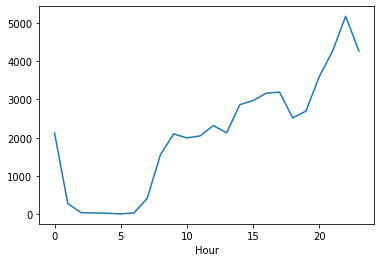

In [89]:
df.groupby('Hour').apply(lambda x: len(x)).plot()